In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import glob
import os
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np

decade = np.arange(2010, 2020,1)
decade

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [3]:
# Read in the data from UCI-Calendars notebook
df = pd.read_csv('./data/cleaned_uci_data_01_09_20.csv')

In [4]:
df.head()

,Unnamed: 0,Start_date,End_Date,Name,Country,Category,Class,Season,Race_Days,Continent
0,0,2017-10-24,2017-10-29,Vuelta a Colombia Femenina Oro y Paz,COLOMBIA,WE,2.2,2018,6.0,Americas
1,1,2017-10-23,2017-11-01,Vuelta a Guatemala,GUATEMALA,ME,2.2,2018,10.0,Americas
2,5,2017-10-27,2017-11-05,Tour du Faso,BURKINA FASO,ME,2.2,2018,10.0,Africas
3,6,2017-10-27,2017-11-05,Vuelta Ciclista a Venezuela,BOLIVARIAN REPUBLIC OF VENEZUELA,ME,2.2,2018,10.0,Americas
4,7,2017-10-28,2017-11-05,Tour of Hainan,PEOPLE'S REPUBLIC OF CHINA,ME,2.HC,2018,9.0,Asia


In [57]:
dfcat = df.loc[df['Season'].isin(decade)]
# dfcat = dfcat.loc[df['Category'].isin(['ME','WE'])]
dfcat = dfcat.groupby(['Category','Season'])['Race_Days'].sum().unstack('Category')
dfcat

Category,ME,MJ,MU,WE,WJ
Season,,,,,
2010,1203.0,123.0,51.0,123.0,2.0
2011,1201.0,106.0,53.0,128.0,2.0
2012,1133.0,99.0,61.0,166.0,3.0
2013,1064.0,89.0,55.0,146.0,5.0
2014,1133.0,77.0,49.0,167.0,1.0
2015,1141.0,76.0,50.0,183.0,2.0
2016,1010.0,88.0,60.0,201.0,10.0
2017,1095.0,100.0,66.0,161.0,10.0
2018,1091.0,102.0,76.0,184.0,12.0


In [58]:
dfwcat = df.loc[df['Season'].isin(decade)]
dfwcat = dfwcat.loc[dfwcat['Category'] == 'WE']
# dfwcat = dfwcat.loc[df['Class'].isin(['2.2','2.1'])]
dfwcat = dfwcat.groupby(['Season','Continent'])['Race_Days'].sum().unstack(['Continent'])
dfwcat

Continent,Africas,Americas,Asia,Europe,Oceania
Season,,,,,
2010,NaN,3.0,7.0,108.0,5.0
2011,NaN,5.0,9.0,109.0,5.0
2012,5.0,19.0,21.0,116.0,5.0
2013,NaN,16.0,19.0,111.0,NaN
2014,NaN,26.0,19.0,122.0,NaN
2015,3.0,31.0,19.0,125.0,5.0
2016,NaN,40.0,19.0,137.0,5.0
2017,3.0,27.0,10.0,116.0,5.0
2018,1.0,32.0,18.0,126.0,7.0


In [42]:
# For the last decade limit the season
dfd = df.loc[df['Season'].isin([2010,2019])]
dfd.groupby(['Category','Season'])['Race_Days'].sum()

Category  Season
ME        2010      1203.0
          2019      1096.0
MJ        2010       123.0
          2019        91.0
MU        2010        51.0
          2019        73.0
WE        2010       123.0
          2019       225.0
WJ        2010         2.0
          2019        12.0
Name: Race_Days, dtype: float64

In [25]:
dfm = dfd.loc[dfd['Category'] == 'ME']
dfm.groupby(['Season','Class','Continent'])['Race_Days'].sum()

Season  Class  Continent
2010    1.1    Europe        85.0
        1.2    Africas        4.0
               Americas       3.0
               Asia          10.0
               Europe        69.0
        1.HC   Americas       1.0
               Asia           1.0
               Europe        14.0
        1.UWT  Americas       2.0
               Europe        11.0
        2.1    Africas        6.0
               Americas      14.0
               Asia          12.0
               Europe       145.0
               Oceania        7.0
        2.2    Africas       67.0
               Americas     171.0
               Asia         135.0
               Europe       211.0
               Oceania       11.0
        2.HC   Americas       8.0
               Asia          33.0
               Europe        48.0
        2.UWT  Europe       129.0
               Oceania        6.0
2019    1.1    Europe        65.0
        1.2    Africas        7.0
               Americas       9.0
               Asia    

In [27]:
dfw = dfd.loc[dfd['Category'] == 'WE']
dfw.groupby(['Season','Class','Continent'])['Race_Days'].sum()

Season  Class  Continent
2010    1.1    Americas      2.0
               Europe        8.0
        1.2    Americas      1.0
               Europe       14.0
        2.1    Asia          6.0
               Europe       46.0
        2.2    Europe       32.0
               Oceania       5.0
        CDM    Asia          1.0
               Europe        8.0
2019    1.1    Americas      3.0
               Asia          1.0
               Europe       17.0
               Oceania       1.0
        1.2    Americas      9.0
               Asia         11.0
               Europe       25.0
               Oceania       1.0
        1.WWT  Europe       14.0
        2.1    Americas      4.0
               Asia          5.0
               Europe       38.0
               Oceania       4.0
        2.2    Americas     22.0
               Asia          2.0
               Europe       28.0
               Oceania       2.0
        2.WWT  Americas      3.0
               Asia          3.0
               Eur

In [35]:
country_count = df.groupby(['Season','Category', 'Continent'])['Country'].nunique()
country_count.to_csv('./data/country_count_season_cat_continent.csv')
country_count

Season  Category  Continent
2006    ME        Africas       6
                  Americas     11
                  Asia         12
                  Europe       27
                  Oceania       2
        MJ        Americas      1
                  Asia          1
                  Europe       12
        MU        Europe        6
        WE        Americas      4
                  Europe       12
                  Oceania       2
        WJ        Europe        1
2007    ME        Africas       9
                  Americas     13
                  Asia         12
                  Europe       27
                  Oceania       2
        MJ        Americas      1
                  Asia          1
                  Europe       13
        MU        Europe        7
        WE        Americas      4
                  Asia          1
                  Europe       11
                  Oceania       2
        WJ        Europe        2
2008    ME        Africas       9
                  Am

In [13]:
# Making filtered dataframes for graphing
me = df.loc[df['Category']=='ME'] #Elite Men
we = df.loc[df['Category']=='WE'] #Elite Women
mj = df.loc[df['Category']=='MJ'] #Junior Men
u23 = df.loc[df['Category']=='MU'] #U23 Men
wj = df.loc[df['Category']=='WJ'] #Junior Women

americas = df.loc[df['Continent']=='Americas']
europe = df.loc[df['Continent']=='Europe']
asia = df.loc[df['Continent']=='Asia']
africa = df.loc[df['Continent']=='Africas']
oceania = df.loc[df['Continent']=='Oceania']

In [16]:
all_races = df.groupby(['Season','Category','Continent']).sum()['Race_Days'].unstack(['Category'], fill_value=0)
# stackedbar(all_races,'Year','Race Days','All Races','all_races')
all_races = all_races.reset_index()
all_races
# all_races.to_csv('race_days_continent_category.csv')

Category,Season,Continent,ME,MJ,MU,WE,WJ
0,2010,Africas,77.0,0.0,0.0,0.0,0.0
1,2010,Americas,199.0,6.0,4.0,3.0,0.0
2,2010,Asia,191.0,12.0,0.0,7.0,0.0
3,2010,Europe,712.0,105.0,47.0,108.0,2.0
4,2010,Oceania,24.0,0.0,0.0,5.0,0.0
5,2019,Africas,80.0,0.0,6.0,0.0,0.0
6,2019,Americas,135.0,6.0,0.0,41.0,0.0
7,2019,Asia,219.0,5.0,0.0,22.0,0.0
8,2019,Europe,644.0,80.0,67.0,154.0,12.0
9,2019,Oceania,18.0,0.0,0.0,8.0,0.0


In [10]:
# Just plotting the races in a bar chart is a hot mess because men's races are so much of the calendar
data_files = all_races.columns


In [21]:
color_list = ['tab:purple', 'tab:brown', 'tab:pink', 'tab:olive','tab:cyan','tab:orange']
d2c = dict(zip(data_files, color_list))

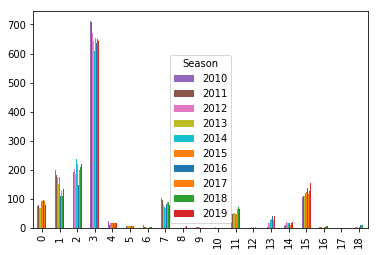

In [22]:
all_races.plot(kind='bar', color=map(d2c.get,all_races.columns))

In [52]:
def stackedbar(df,x,y,title,outname):
    plt.set_cmap('Set2')
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    fig.ylimit=(0,400)
    fig.xlimit=(0,30)
    data_files = df.columns
    color_list = ['tab:olive', 'tab:orange', 'tab:cyan', 'tab:blue','tab:red']
    d2c = dict(zip(data_files, color_list))
    df.plot(kind='bar',stacked=True, color=map(d2c.get,df.columns))
    # Add some labels and title
    plt.xlabel(x, fontsize=12, fontweight='bold')
    plt.ylabel(y, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best')
# Save the figure
    plt.savefig(f'./graphics/{outname}.png')

<Figure size 864x576 with 0 Axes>

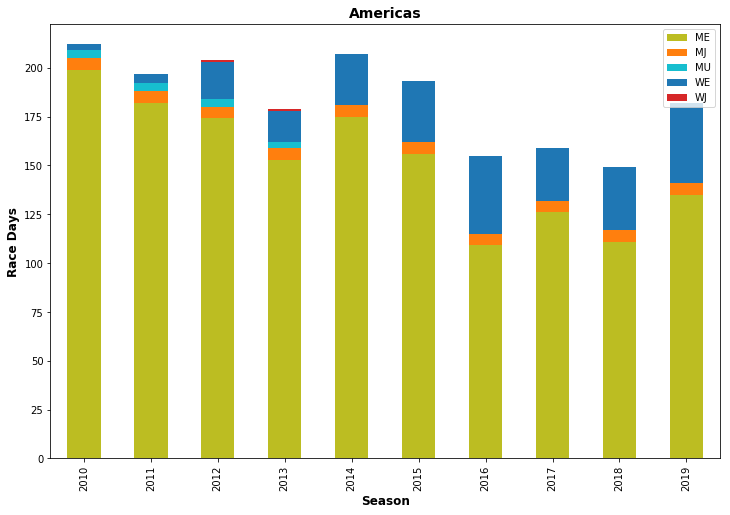

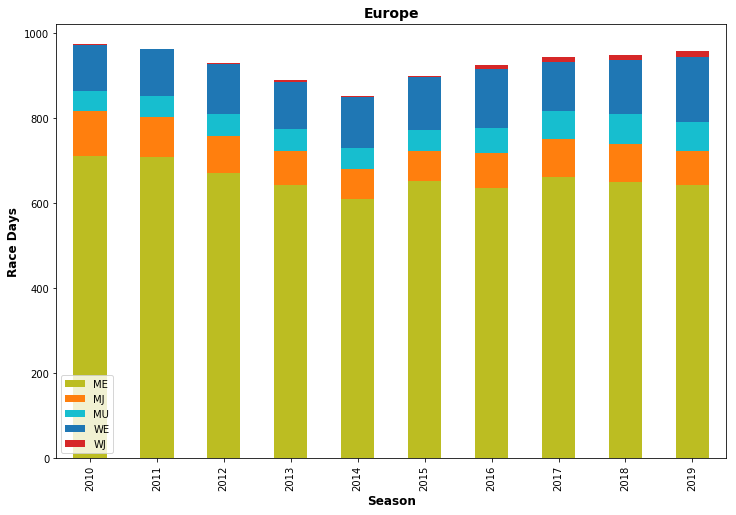

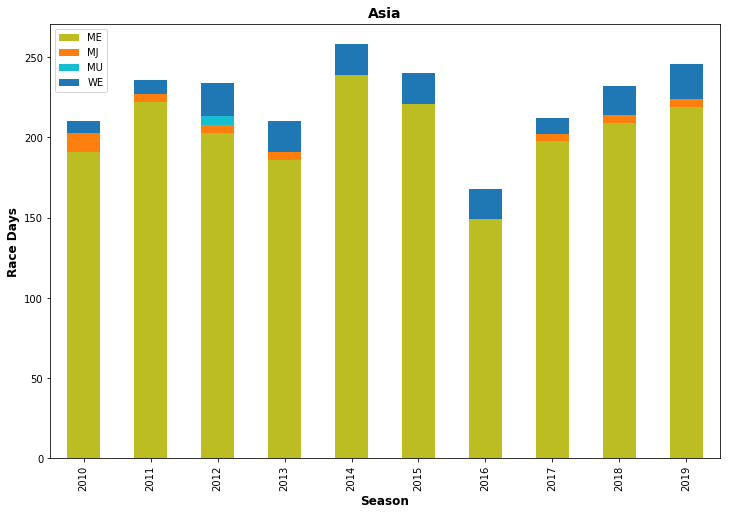

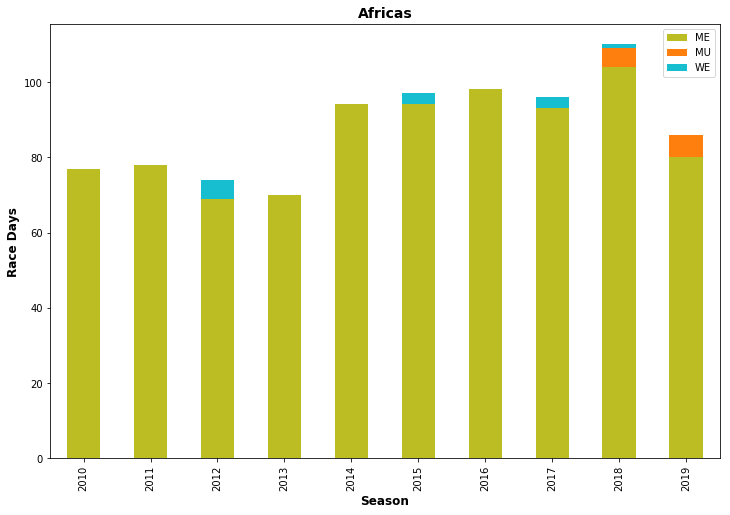

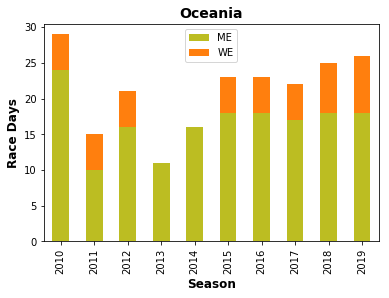

In [57]:
# Graphing by Category
conti_df = [americas,europe,asia,africa,oceania]

try:
    for item in conti_df:
        x = 'Season'
        y = 'Race Days'
        title = item.Continent.min()
        file = 'Continent_' + str(title)
        pdf = item.groupby(['Season','Category']).sum()['Race_Days'].unstack(['Category'], fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for continent {title}')

No handles with labels found to put in legend.


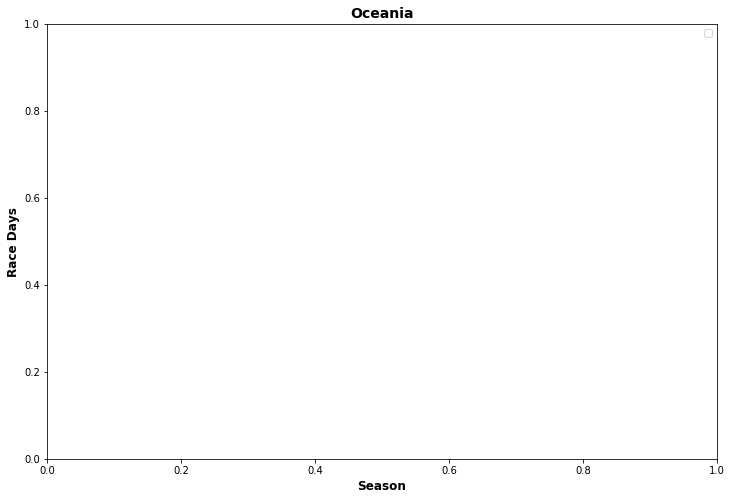

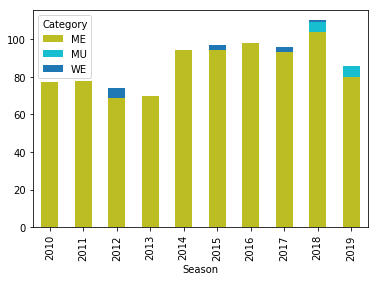

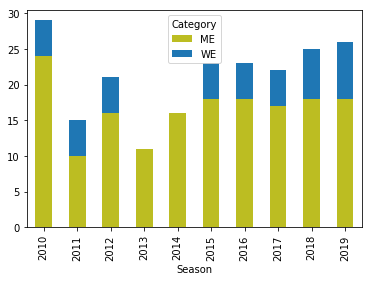

In [61]:
# Mapping the colors for races with none in some categories :()
x = 'Season'
y = 'Race Days'
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,400)
fig.xlimit=(0,30)
# Add some labels and title
plt.xlabel(x, fontsize=12, fontweight='bold')
plt.ylabel(y, fontsize=12, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')
plt.legend(loc='best')

title = item.Continent.min()
file = 'Category_' + str(title)
africag = africa.groupby(['Season','Category']).sum()['Race_Days'].unstack(['Category'], fill_value=0)
data_files = africag.columns
color_list = ['tab:olive', 'tab:cyan', 'tab:blue']
d2c = dict(zip(data_files, color_list))
title = 'Africa'
file = 'Category_' + str(title)

africag.plot(kind='bar',stacked=True, color=map(d2c.get,africag.columns))
# Save the figure
plt.savefig(f'./graphics/Africa.png')

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,400)
fig.xlimit=(0,30)
# Add some labels and title
plt.xlabel(x, fontsize=12, fontweight='bold')
plt.ylabel(y, fontsize=12, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')
plt.legend(loc='best')

oceaniag = oceania.groupby(['Season','Category']).sum()['Race_Days'].unstack(['Category'], fill_value=0)
data_files = oceaniag.columns
color_list = ['tab:olive','tab:blue']
d2c = dict(zip(data_files, color_list))
title = 'Oceania'
file = 'Category_' + str(title)

oceaniag.plot(kind='bar',stacked=True, color=map(d2c.get,oceaniag.columns))
plt.savefig(f'./graphics/Oceania.png')

<Figure size 864x576 with 0 Axes>

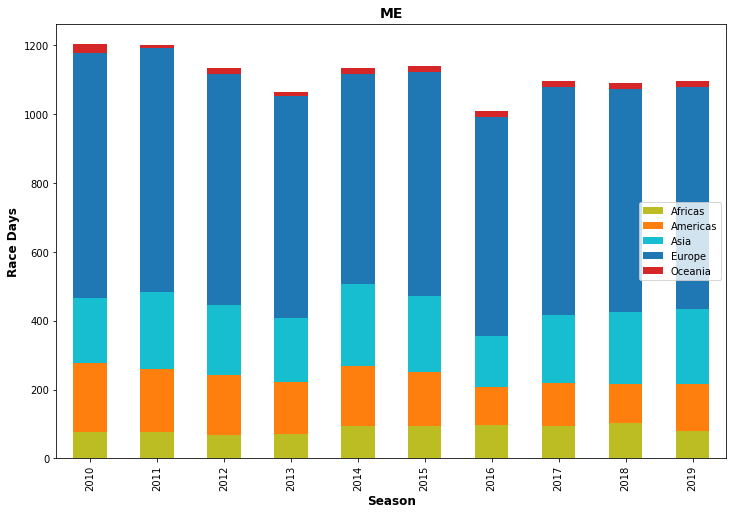

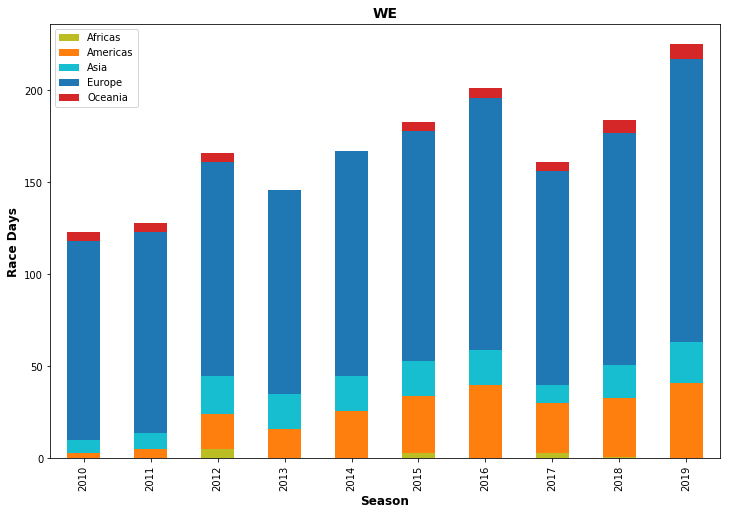

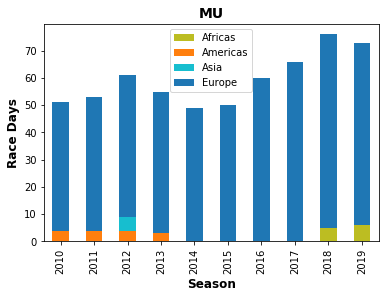

In [55]:
# Graphing by Continent
cat_df = [me,we,u23]

try:
    for item in cat_df:
        x = 'Season'
        y = 'Race Days'
        title = item.Category.min()
        file = 'Filename_' + str(title)
        pdf = item.groupby(['Season','Continent']).sum()['Race_Days'].unstack(['Continent'], fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for continent {title}')

<Figure size 864x576 with 0 Axes>

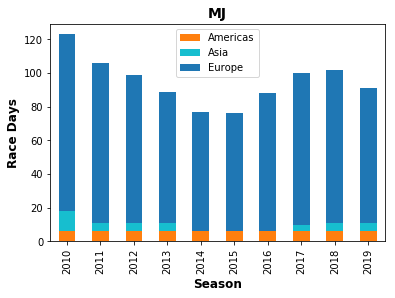

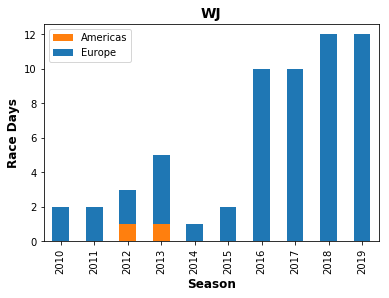

In [64]:
# Mapping the colors for races with none in some continents :()
x = 'Season'
y = 'Race Days'
title = item.Category.min()
file = 'Category_' + str(title)
mjg = mj.groupby(['Season','Continent']).sum()['Race_Days'].unstack(['Continent'], fill_value=0)

fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,400)
fig.xlimit=(0,30)
data_files = mjg.columns
color_list = ['tab:orange', 'tab:cyan', 'tab:blue']
d2c = dict(zip(data_files, color_list))
title = 'MJ'
mjg.plot(kind='bar',stacked=True, color=map(d2c.get,mjg.columns))
# Add some labels and title
plt.xlabel(x, fontsize=12, fontweight='bold')
plt.ylabel(y, fontsize=12, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')
plt.legend(loc='best')
# Save the figure
plt.savefig(f'./graphics/Filename_MJ.png')

wjg = wj.groupby(['Season','Continent']).sum()['Race_Days'].unstack(['Continent'], fill_value=0)
data_files = wjg.columns
color_list = ['tab:orange','tab:blue']
d2c = dict(zip(data_files, color_list))
wjg.plot(kind='bar',stacked=True, color=map(d2c.get,wjg.columns))
title='WJ'
plt.xlabel(x, fontsize=12, fontweight='bold')
plt.ylabel(y, fontsize=12, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')
plt.legend(loc='best')

plt.savefig(f'./graphics/Filename_WJ.png')

In [38]:
top7 = ['BELGIUM','FRANCE','ITALY','NETHERLANDS','SPAIN','POLAND','GERMANY','GREAT BRITAIN','UNITED STATES OF AMERICA']
top7rc = df.loc[df['Country'].isin(top7)]
men_races = top7rc.loc[top7rc['Category']=='ME']
men_races = men_races.groupby(['Country','Season'])['Race_Days'].sum().unstack('Season',fill_value=0)
men_races


Season,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
BELGIUM,69.0,72.0,75.0,70.0,68.0,71.0,68.0,71.0,66.0,62.0
FRANCE,199.0,196.0,187.0,181.0,176.0,172.0,175.0,170.0,167.0,175.0
GERMANY,12.0,12.0,11.0,10.0,10.0,10.0,5.0,5.0,8.0,8.0
GREAT BRITAIN,9.0,10.0,9.0,10.0,11.0,15.0,15.0,15.0,14.0,14.0
ITALY,125.0,121.0,99.0,77.0,69.0,65.0,60.0,61.0,68.0,72.0
NETHERLANDS,27.0,28.0,27.0,29.0,28.0,28.0,19.0,23.0,16.0,19.0
POLAND,30.0,26.0,27.0,27.0,29.0,39.0,34.0,40.0,37.0,38.0
SPAIN,95.0,84.0,70.0,64.0,59.0,63.0,69.0,70.0,72.0,73.0
UNITED STATES OF AMERICA,12.0,26.0,32.0,31.0,30.0,34.0,27.0,33.0,29.0,25.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "none". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


<Figure size 864x576 with 0 Axes>

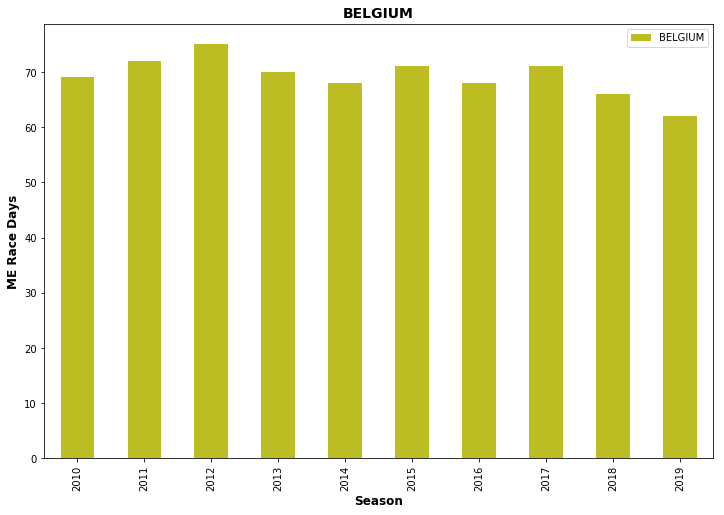

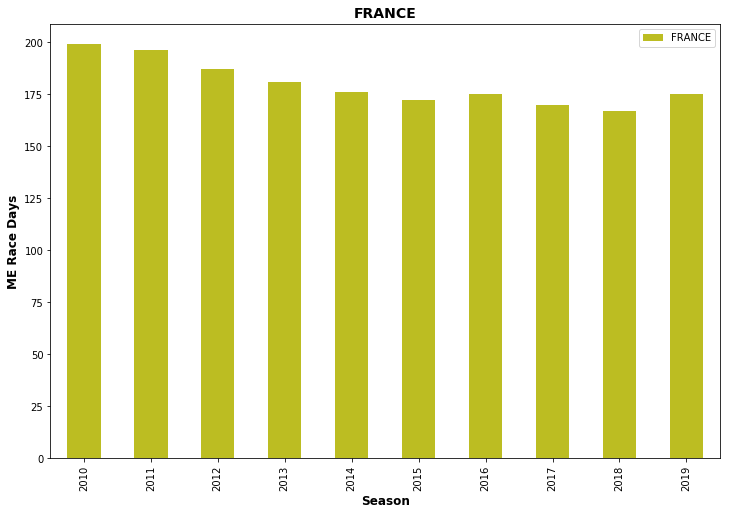

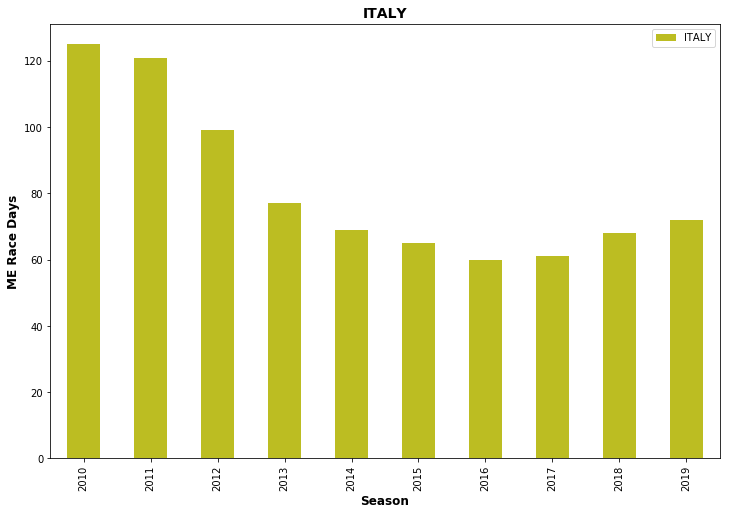

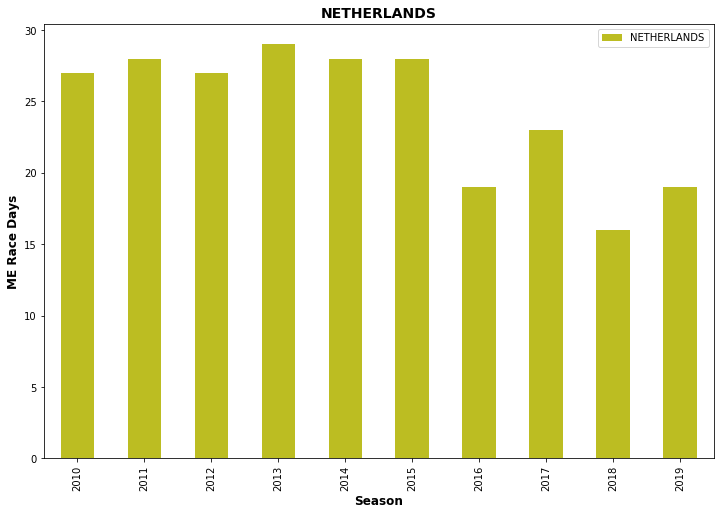

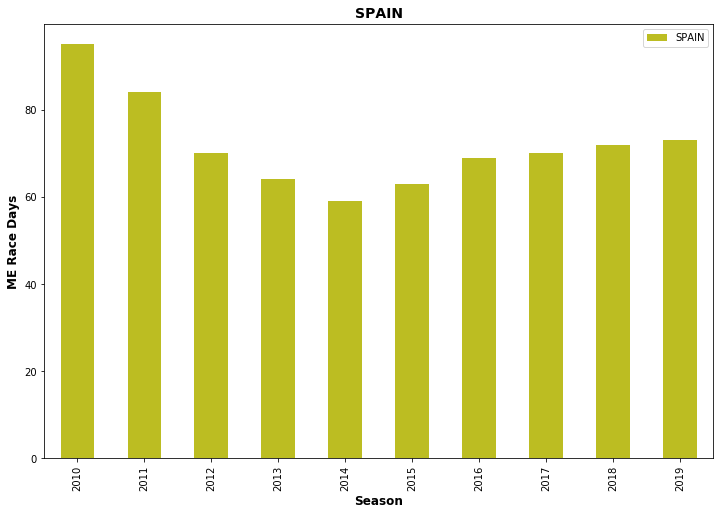

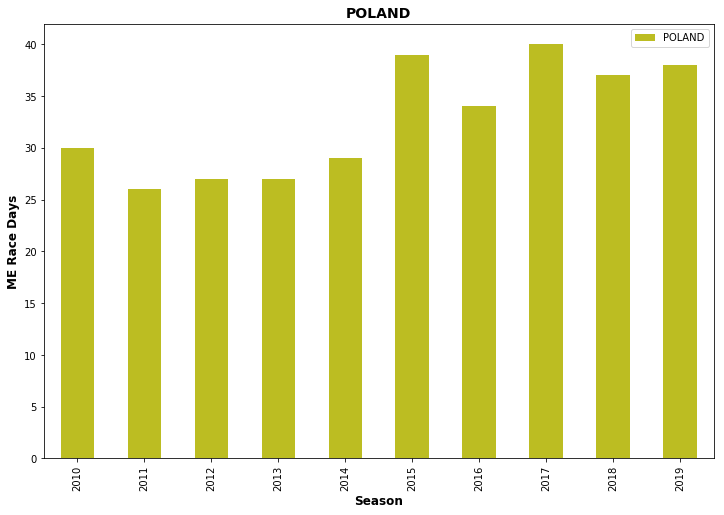

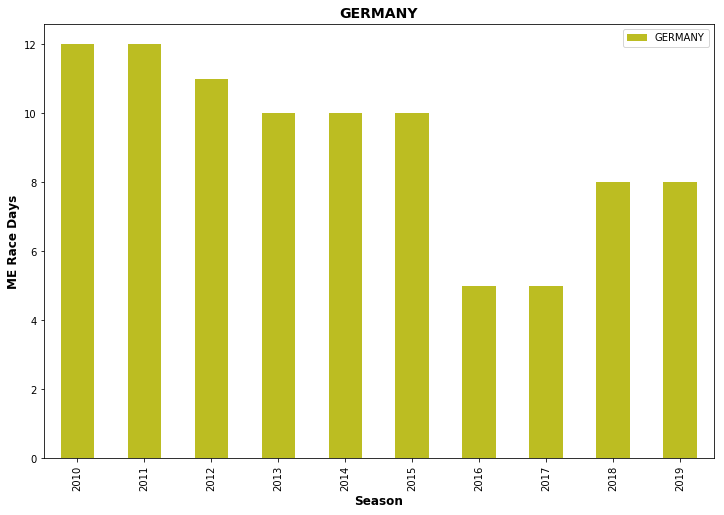

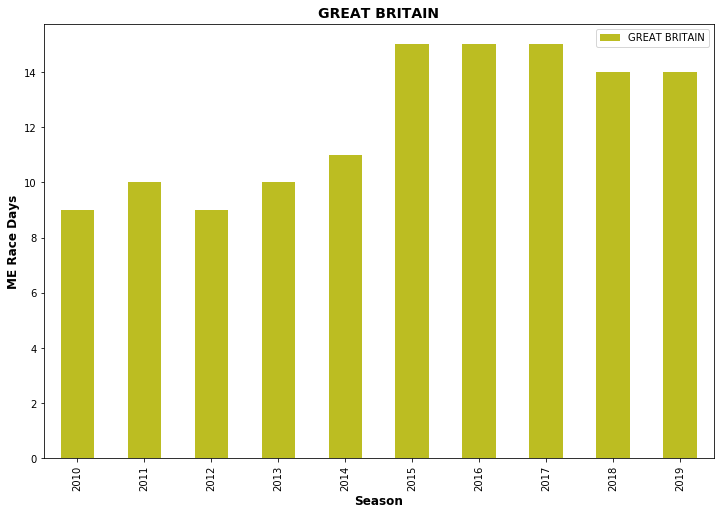

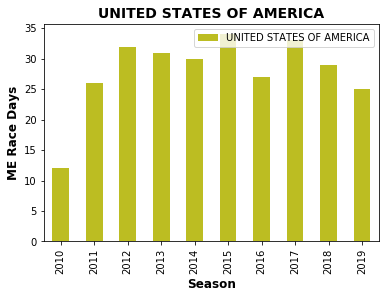

In [43]:
try:
    for item in top7:
        x = 'Season'
        y = 'ME Race Days'
        title = item
        file = 'ME_Filename_' + str(title)
        tdf = me.loc[me['Country']==item]
        pdf = tdf.groupby(['Country','Season'])['Race_Days'].sum().unstack('Country',fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for {title}')

<Figure size 864x576 with 0 Axes>

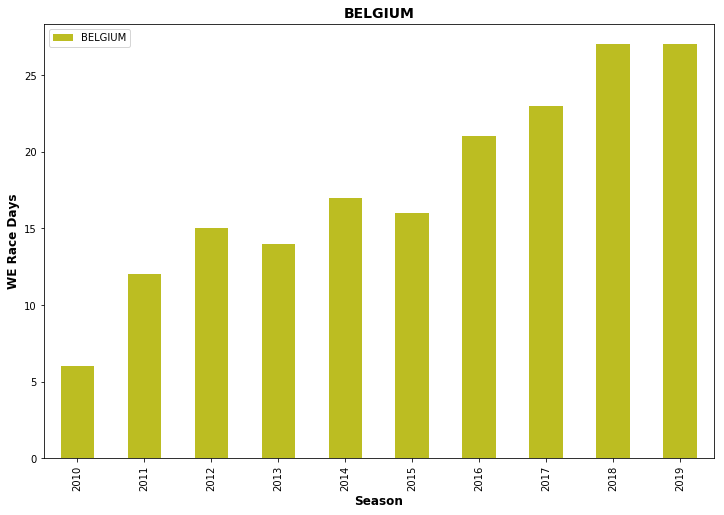

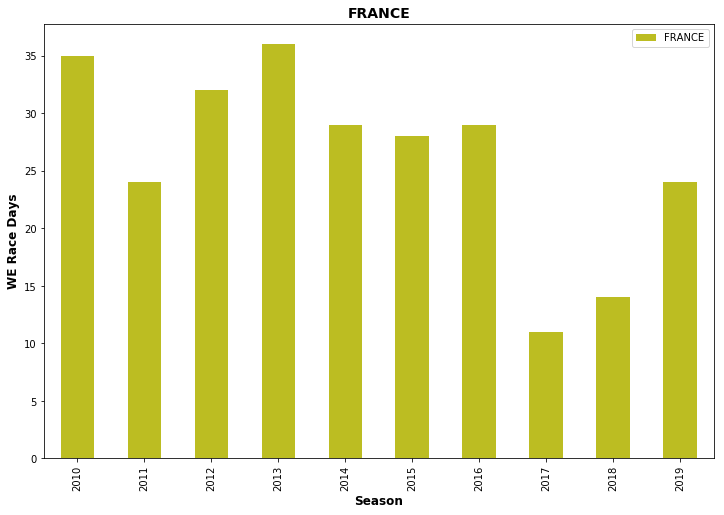

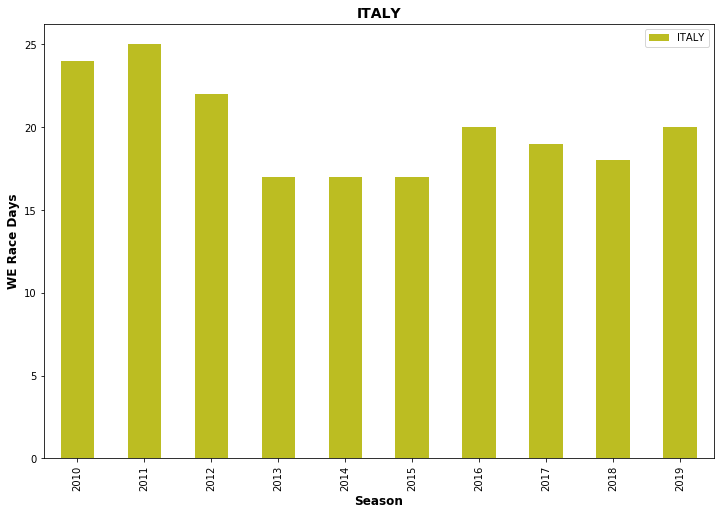

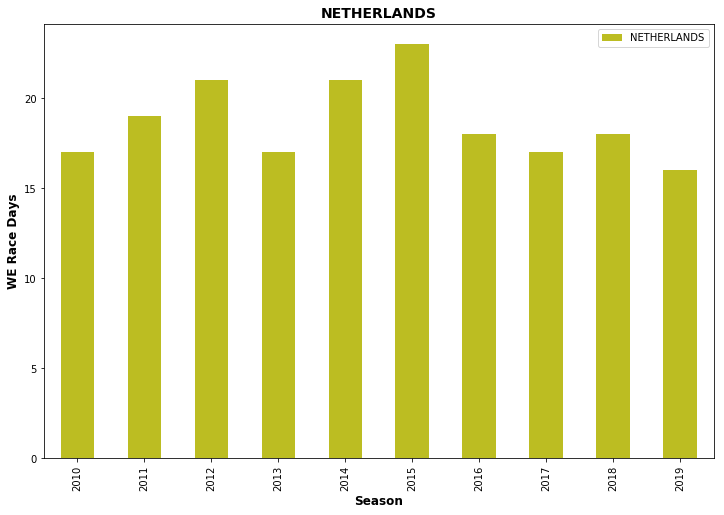

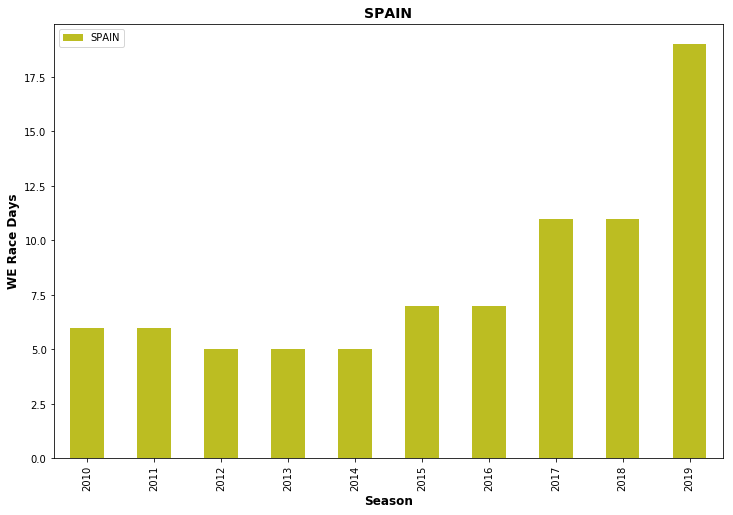

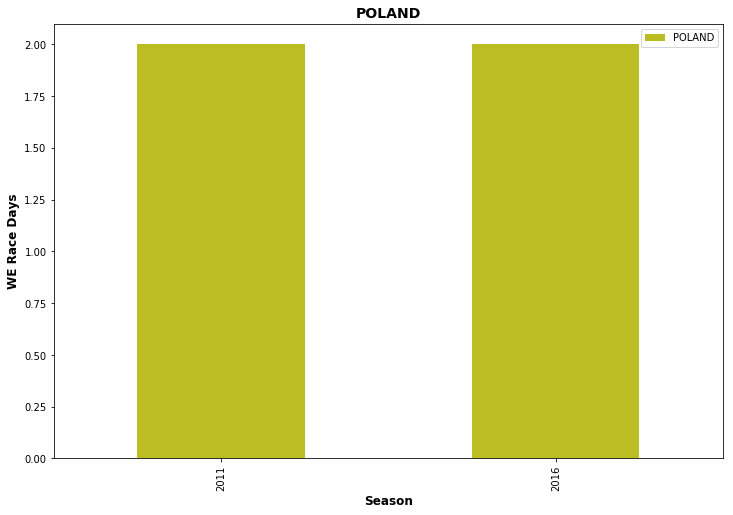

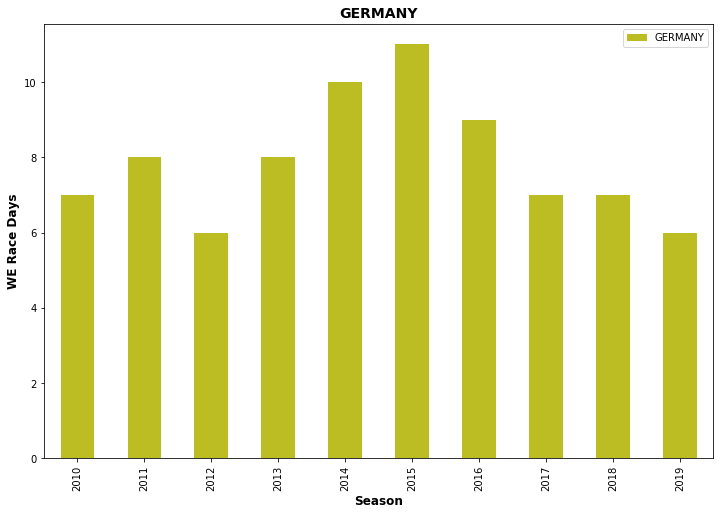

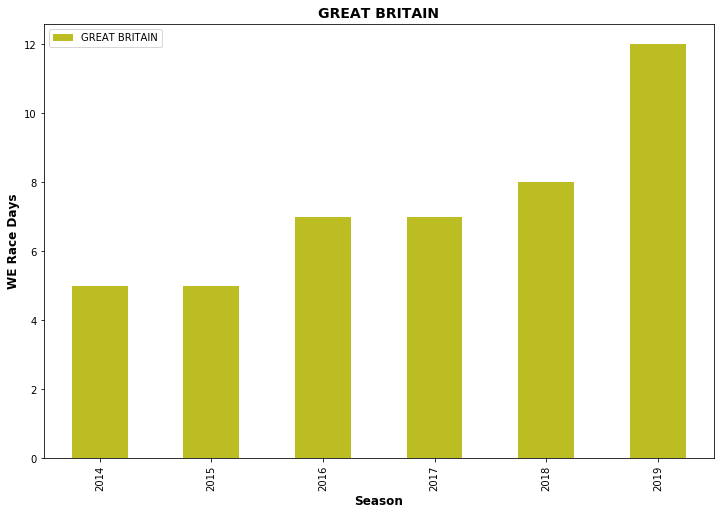

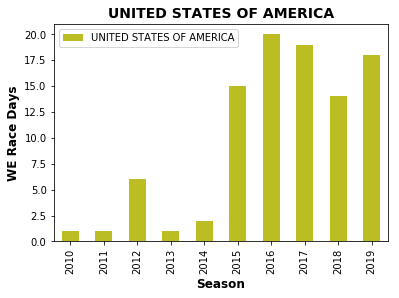

In [45]:
try:
    for item in top7:
        x = 'Season'
        y = 'WE Race Days'
        title = item
        file = 'WE_Filename_' + str(title)
        tdf = we.loc[we['Country']==item]
        pdf = tdf.groupby(['Country','Season'])['Race_Days'].sum().unstack('Country',fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for {title}')

In [63]:
df1 = df.loc[df['Category'].isin(['WE','ME'])]
cls = df1.groupby(['Class','Season','Category','Country'])['Race_Days'].sum().unstack(['Category'])
cls = cls.reset_index()

cls['Class'].unique()

array(['1.1', '1.2', '1.HC', '1.UWT', '1.WWT', '2.1', '2.2', '2.HC',
       '2.UWT', '2.WWT'], dtype=object)

In [64]:
cls

Category,Class,Season,Country,ME,WE
0,1.1,2010,BELGIUM,17.0,1.0
1,1.1,2010,CANADA,NaN,1.0
2,1.1,2010,DENMARK,1.0,NaN
3,1.1,2010,ESTONIA,2.0,NaN
4,1.1,2010,FRANCE,18.0,2.0
5,1.1,2010,GERMANY,4.0,1.0
6,1.1,2010,ITALY,23.0,NaN
7,1.1,2010,LUXEMBOURG,NaN,1.0
8,1.1,2010,NETHERLANDS,5.0,2.0
9,1.1,2010,SLOVENIA,1.0,NaN


In [89]:
cls['Class'].unique()

array(['1.1', '1.2', '1.HC', '1.UWT', '1.WWT', '2.1', '2.2', '2.HC',
       '2.UWT', '2.WWT'], dtype=object)

In [90]:
equiv = {'1.1':'One Day (.1)', '1.2':'One Day (.2)', '1.HC':'One Day (.HC/WT)','1.UWT':'One Day (.HC/WT)','1.WWT':'One Day (.HC/WT)'\
         ,'2.1':'Stage Race (.1)', '2.2':'Stage Race (.2)', '2.HC':'Stage Race (.HC/WT)','2.UWT':'Stage Race (.HC/WT)', '2.WWT':'Stage Race (.HC/WT)'}
cls["Type"] = cls["Class"].map(equiv)

In [91]:
cls

Category,Class,Season,ME,WE,Type
0,1.1,2010,85.0,10.0,One Day (.1)
1,1.1,2011,85.0,10.0,One Day (.1)
2,1.1,2012,79.0,10.0,One Day (.1)
3,1.1,2013,75.0,9.0,One Day (.1)
4,1.1,2014,74.0,14.0,One Day (.1)
5,1.1,2015,68.0,18.0,One Day (.1)
6,1.1,2016,64.0,15.0,One Day (.1)
7,1.1,2017,71.0,20.0,One Day (.1)
8,1.1,2018,69.0,21.0,One Day (.1)
9,1.1,2019,65.0,22.0,One Day (.1)


In [92]:
cls = cls.groupby(['Type','Season']).sum()
cls = cls.reset_index()
cls

Category,Type,Season,ME,WE
0,One Day (.1),2010,85.0,10.0
1,One Day (.1),2011,85.0,10.0
2,One Day (.1),2012,79.0,10.0
3,One Day (.1),2013,75.0,9.0
4,One Day (.1),2014,74.0,14.0
5,One Day (.1),2015,68.0,18.0
6,One Day (.1),2016,64.0,15.0
7,One Day (.1),2017,71.0,20.0
8,One Day (.1),2018,69.0,21.0
9,One Day (.1),2019,65.0,22.0


In [93]:
cls.to_csv('race_days_type_category.csv')

In [46]:
cont2 = df.loc[df['Class'] == '2.2']

In [47]:
cont2 = cont2.groupby(['Season','Continent','Category'])['Race_Days'].sum()

In [48]:
cont2 = cont2.reset_index()

In [49]:
cont2 = cont2.loc[cont2.Category=='ME']

In [51]:
# Graphing by Continent
cat_df = [cont2]

try:
    for item in cat_df:
        x = 'Season'
        y = 'Race Days'
        title = item.Category.min()
        file = 'Filename_' + str(title)
        pdf = item.groupby(['Season','Continent']).sum()['Race_Days'].unstack(['Continent'], fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for continent {title}')

,Season,Continent,Category,Race_Days
74,2019,Africas,ME,58.0
75,2019,Americas,ME,96.0
77,2019,Asia,ME,81.0
79,2019,Europe,ME,126.0
81,2019,Oceania,ME,5.0


In [102]:
cont2.to_csv('2.2_race_days_ME_continent.csv')

In [5]:
data = df.groupby(['Season','Country','Class','Category'])['Name'].count()
data.reset_index()

,Season,Country,Class,Category,Name
0,2006,AUSTRALIA,1.2,ME,1
1,2006,AUSTRALIA,2.1,ME,1
2,2006,AUSTRALIA,2.2,WE,1
3,2006,AUSTRALIA,2.HC,ME,1
4,2006,AUSTRIA,1.2,ME,1
5,2006,AUSTRIA,2.HC,ME,1
6,2006,BELGIUM,1.1,ME,16
7,2006,BELGIUM,1.1,MJ,13
8,2006,BELGIUM,1.2,ME,10
9,2006,BELGIUM,1.2,WE,2


In [12]:
data

Class                                     1.1                  1.2           \
Category                                   ME   MJ   WE   WJ    ME   WE  WJ   
Season Country                                                                
2010   ARGENTINA                          NaN  NaN  NaN  NaN   NaN  NaN NaN   
       AUSTRALIA                          NaN  NaN  NaN  NaN   NaN  NaN NaN   
       AUSTRIA                            NaN  NaN  NaN  NaN   1.0  NaN NaN   
       BELGIUM                           17.0  8.0  1.0  NaN  13.0  3.0 NaN   
       BOLIVARIAN REPUBLIC OF VENEZUELA   NaN  NaN  NaN  NaN   NaN  NaN NaN   
       BOLIVIA                            NaN  NaN  NaN  NaN   NaN  NaN NaN   
       BOSNIA AND HERZEGOVINA             NaN  NaN  NaN  NaN   1.0  NaN NaN   
       BRAZIL                             NaN  NaN  NaN  NaN   NaN  NaN NaN   
       BULGARIA                           NaN  NaN  NaN  NaN   NaN  NaN NaN   
       BURKINA FASO                       NaN  NaN  NaN  NaN   NaN  NaN NaN   
       CAMEROON                           NaN  NaN  NaN  NaN   NaN  NaN NaN   
       CANADA                             NaN  NaN  1.0  NaN   1.0  1.0 NaN   
       CHINESE TAIPEI                     NaN  NaN  NaN  NaN   NaN  NaN NaN   
       COLOMBIA                           NaN  NaN  NaN  NaN   NaN  NaN NaN   
       COSTA RICA                         NaN  NaN  NaN  NaN   NaN  NaN NaN   
       CROATIA                            NaN  NaN  NaN  NaN   1.0  NaN NaN   
       CUBA                               NaN  NaN  NaN  NaN   NaN  NaN NaN   
       CZECH REPUBLIC                     NaN  NaN  NaN  NaN   1.0  NaN NaN   
       DENMARK                            1.0  1.0  NaN  NaN   NaN  NaN NaN   
       DOMINICAN REPUBLIC                 NaN  NaN  NaN  NaN   NaN  NaN NaN   
       ECUADOR                            NaN  NaN  NaN  NaN   NaN  NaN NaN   
       ERITREA                            NaN  NaN  NaN  NaN   NaN  NaN NaN   
       ESTONIA                            2.0  NaN  NaN  NaN   NaN  NaN NaN   
       FRANCE                            18.0  3.0  2.0  1.0  12.0  NaN NaN   
       GABON                              NaN  NaN  NaN  NaN   NaN  NaN NaN   
       GERMANY                            4.0  NaN  1.0  NaN   1.0  NaN NaN   
       GREAT BRITAIN                      NaN  NaN  NaN  NaN   1.0  NaN NaN   
       GUATEMALA                          NaN  NaN  NaN  NaN   NaN  NaN NaN   
       HUNGARY                            NaN  NaN  NaN  NaN   2.0  NaN NaN   
       INDIA                              NaN  NaN  NaN  NaN   2.0  NaN NaN   
...                                       ...  ...  ...  ...   ...  ...  ..   
2019   KOREA                              NaN  NaN  NaN  NaN   NaN  NaN NaN   
       KOSOVO                             NaN  NaN  NaN  NaN   NaN  NaN NaN   
       LUXEMBOURG                         NaN  2.0  NaN  NaN   NaN  NaN NaN   
       MALAYSIA                           NaN  NaN  NaN  NaN   NaN  NaN NaN   
       MEXICO                             NaN  NaN  NaN  NaN   NaN  NaN NaN   
       MOROCCO                            NaN  NaN  NaN  NaN   6.0  NaN NaN   
       NETHERLANDS                        4.0  1.0  1.0  NaN   5.0  2.0 NaN   
       NEW ZEALAND                        NaN  NaN  NaN  NaN   1.0  1.0 NaN   
       NORWAY                             NaN  NaN  NaN  NaN   5.0  NaN NaN   
       OMAN                               NaN  NaN  NaN  NaN   NaN  NaN NaN   
       PEOPLE'S REPUBLIC OF CHINA         NaN  NaN  NaN  NaN   NaN  5.0 NaN   
       PHILIPPINES                        NaN  NaN  NaN  NaN   NaN  NaN NaN   
       POLAND                             NaN  NaN  NaN  NaN   8.0  NaN NaN   
       PORTUGAL                           NaN  NaN  NaN  NaN   1.0  NaN NaN   
       ROMANIA                            NaN  NaN  NaN  NaN   NaN  NaN NaN   
       RUSSIAN FEDERATION                 NaN  NaN  NaN  NaN   NaN  NaN NaN   
       RWANDA                             NaN  NaN

In [6]:
data.to_csv('country_year_class_category.csv')

/Users/laura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [7]:
stage_races = df.loc[df['Class']=='2.2']
stage_races.groupby(['Category','Season'])['Race_Days'].mean()

Category  Season
ME        2006      6.651163
          2007      6.572917
          2008      6.391753
          2009      6.134021
          2010      6.071429
          2011      5.785714
          2012      5.987952
          2013      5.513158
          2014      5.481481
          2015      5.068182
          2016      5.142857
          2017      5.118421
          2018      5.064103
          2019      4.880000
WE        2006      4.214286
          2007      4.500000
          2008      4.550000
          2009      4.153846
          2010      4.625000
          2011      4.300000
          2012      4.076923
          2013      4.307692
          2014      4.000000
          2015      4.000000
          2016      3.650000
          2017      4.333333
          2018      3.857143
          2019      3.375000
Name: Race_Days, dtype: float64